In [1]:
import sys
sys.path.append("/media/hdd/viscent/SR-UNet")
from utils.inference_utils import *
%matplotlib inline

In [2]:
subject = tio.Subject(
    image_t1=tio.ScalarImage('/media/hdd/HCP_1200/100206/T1w/100206/mri/T1w_hires.nii.gz'),
    image_t2=tio.ScalarImage('/media/hdd/HCP_1200/100206/T1w/100206/mri/T2w_hires.nii.gz'),
    mask = tio.LabelMap('/media/hdd/HCP_1200/100206/T1w/brainmask_fs.nii.gz')
)

In [3]:
subject_hf = tio.Subject(
    image_t1=tio.ScalarImage('/media/hdd/viscent/SR-UNet/inference/Yiqi_Hyperfine-2/Yiqi_MRe_T1_(AXI)-_Gray_White_Contrast_20220715155021_5.nii'),
    image_t2=tio.ScalarImage('/media/hdd/viscent/SR-UNet/inference/Yiqi_Hyperfine-2/Yiqi_MRe_T2_(AXI)_20220715155618_6.nii'),
)

In [26]:
matplotlib.rcParams['figure.figsize'] = [10, 10]
def display_multiplanar(image, x=1, y=1, z=1, save_fig=False, save_path=None, spacing=None):
    plt.figure(figsize=(20, 10),dpi=300)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_facecolor('black')
    ax1.imshow(image[x,:,:], cmap=plt.cm.Greys_r)
    ax1.axis("off")
    ax2.imshow(image[:,y,:], cmap=plt.cm.Greys_r)
    ax2.axis("off")
    ax3.imshow(image[:,:,z], cmap=plt.cm.Greys_r)
    ax3.axis("off")
    plt.show()
    if save_fig:
        fig.savefig(save_path)
    return fig
def display_multiplanar_color(image, x=1, y=1, z=1, save_fig=False, save_path=None):
    x=image.shape[0]//2
    y=image.shape[1]//2
    z=image.shape[2]//2
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(image[x,:,:], cmap='jet')
    ax1.axis("off")
    ax2.imshow(image[:,y,:], cmap='jet')
    ax2.axis("off")
    ax3.imshow(image[:,:,z], cmap='jet')
    ax3.axis("off")
    plt.show()
    return fig

def display_multiplanar_center(image, spacing=None,**kwargs):
    if spacing:
        image = zoom(image, spacing)
    return display_multiplanar(image, x=image.shape[0]//2, y=image.shape[1]//2, z=image.shape[2]//2,**kwargs)


<Figure size 6000x3000 with 0 Axes>

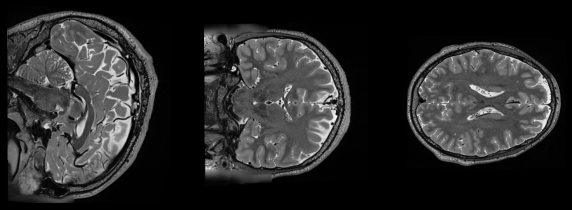

<Figure size 6000x3000 with 0 Axes>

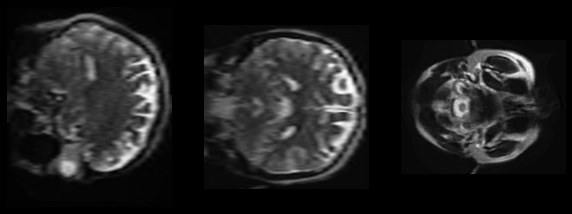

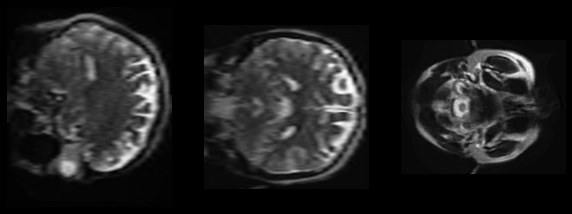

In [8]:
display_multiplanar_center(subject.image_t2.data[0])
display_multiplanar_center(subject_hf.image_t2.data[0],spacing=subject_hf.image_t2.spacing)

<Figure size 6000x3000 with 0 Axes>

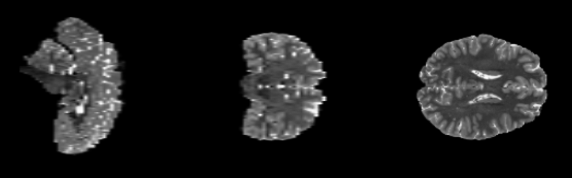

<Figure size 6000x3000 with 0 Axes>

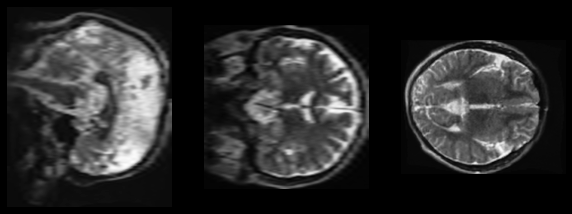

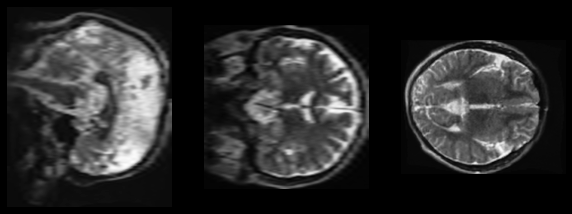

In [35]:
spacing = subject_hf.image_t2.spacing
subject = tio.Subject(
    image_t1=tio.ScalarImage('/media/hdd/HCP_1200/100206/T1w/100206/mri/T1w_hires.nii.gz'),
    image_t2=tio.ScalarImage('/media/hdd/HCP_1200/100206/T1w/100206/mri/T2w_hires.nii.gz'),
    mask = tio.LabelMap('/media/hdd/HCP_1200/100206/T1w/brainmask_fs.nii.gz')
)
subject_hf = tio.Subject(
    image_t1=tio.ScalarImage('/media/hdd/viscent/SR-UNet/inference/Yiqi_Hyperfine-2/Yiqi_MRe_T1_(AXI)-_Gray_White_Contrast_20220715155021_5.nii'),
    image_t2=tio.ScalarImage('/media/hdd/viscent/SR-UNet/inference/Yiqi_Hyperfine-2/Yiqi_MRe_T2_(AXI)_20220715155618_6.nii'),
)
transform_1 = tio.Compose([
    tio.Mask(masking_method='mask'),
    tio.transforms.RescaleIntensity(0., 1.),
    tio.transforms.Resample(spacing),
    tio.transforms.Resample((1.,1.,1.)),
    tio.transforms.RandomGamma((0.4,0.4))
])
transform_1_gt = tio.Compose([
    tio.Mask(masking_method='mask'),
    tio.transforms.RescaleIntensity(0., 1.),
    tio.transforms.Resample((1.,1.,1.)),
    # tio.transforms.RandomGamma((1.5,1.5))
])
subject_gt = transform_1_gt(subject)
subject = transform_1(subject)
edge_max = max(subject.image_t2.data.shape)
padding = ((edge_max - subject.image_t2.data.shape[1]) // 2, 
            (edge_max - subject.image_t2.data.shape[2]) // 2,
                (edge_max - subject.image_t2.data.shape[3]) // 2)
transform_2 = tio.Compose([
    tio.Pad(padding),
    tio.transforms.Resize((160,160,160)),
])
transform_2_gt = tio.Compose([
    tio.Pad(padding),
    tio.transforms.Resize((160,160,160)),
])
subject_gt = transform_2_gt(subject_gt)
subject = transform_2(subject)
display_multiplanar_center(subject.image_t2.data[0])
display_multiplanar_center(subject_hf.image_t2.data[0],spacing=spacing)